In [ ]:
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data cleaning and extracting relevant features
df1 = pd.read_csv("Data/food_data.csv")
df = df1[["cook", "diet_current_coded", "eating_out", "sports", "exercise", "fav_cuisine_coded", 
          "on_off_campus", "pay_meal_out", "fav_food", "fruit_day", "income"]]

In [ ]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)

In [ ]:
# Save cleaned data to a new CSV file
df.to_csv("Data/food_cleaned_data.csv", index=False)

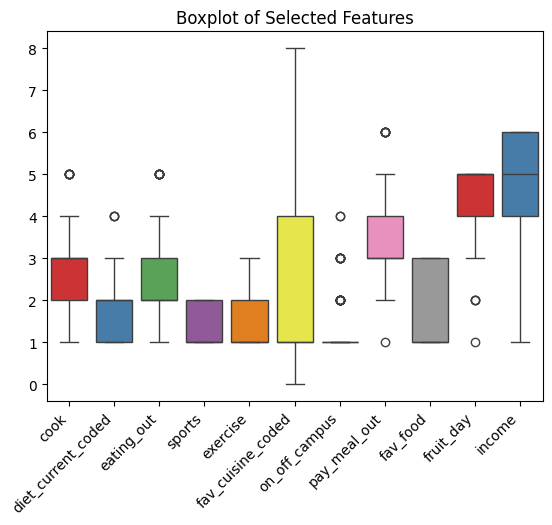

In [ ]:
# Plotting Boxplot for cleaned data
sns.boxplot(data=df, palette="Set1")
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Selected Features')
plt.show()

In [ ]:
# K-Means clustering on cleaned data
X = df.values  # Convert DataFrame to numpy array

In [ ]:
max_k = 4
distortions = []

In [ ]:
# Calculate distortions for different values of k
for i in range(1, max_k + 1):
    if len(X) >= i:
        model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        distortions.append(model.inertia_)

In [ ]:
# Determine the best k using the "elbow" method
if len(distortions) >= 3:
    second_derivatives = np.diff(np.diff(distortions))
    best_k_index = np.argmin(second_derivatives) + 2  # +2 due to diff reduction
    best_k = best_k_index

In [ ]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

In [ ]:
# Plotting Boxplots for each cluster
fig, axes = plt.subplots(1, best_k, sharey=True, figsize=(12, 6))
fig.suptitle('Boxplots of Clusters')

In [ ]:
for i in range(best_k):
    sns.boxplot(data=df[df['Cluster'] == i].drop('Cluster', axis=1), palette="Set1", ax=axes[i])
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8.7)
    axes[i].set_ylabel('Coded Values')

In [ ]:
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
plt.show()